In [148]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

In [149]:
path = 'C:/Users/Flora/Documents/이세은/2-2교과목/확률론/마지막 과제/롤사용량및점유율.csv'
picher = pd.read_csv(path)

In [150]:
picher.head()

,주차,롤 점유율,롤 전주대비 증감률,사용시간,비고
0,2021-06-01,48.09,1.94,1686478,NaN
1,2021-06-02,48.23,0.58,1696286,NaN
2,2021-06-03,48.66,5.65,1792058,NaN
3,2021-06-04,49.34,2.93,1844583,NaN
4,2021-06-05,49.08,5.35,1943291,NaN


In [151]:
print(picher.shape)

(25, 5)


In [152]:
picher = picher.drop('비고', axis=1)

In [153]:
picher = picher.drop('주차', axis=1)
picher

,롤 점유율,롤 전주대비 증감률,사용시간
0,48.09,1.94,1686478
1,48.23,0.58,1696286
2,48.66,5.65,1792058
3,49.34,2.93,1844583
4,49.08,5.35,1943291
5,46.83,-3.89,1867733
6,45.08,-15.39,1580368
7,45.42,1.93,1610830
8,45.24,-0.46,1603355
9,44.57,2.73,1647198


In [154]:
transformer = MinMaxScaler()
#transformer = MinMaxScaler(feature_range=(0, 1))
using_time = np.array(picher['사용시간']).reshape(-1, 1)
transformer.fit(using_time) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
#print(transformer.data_min_) #[2. 1.]
#print(transformer.data_max_) #[ 9. 12.]
picher['사용시간'] = transformer.transform(using_time)

# using_time.shape

In [155]:
transformer = MinMaxScaler()
#transformer = MinMaxScaler(feature_range=(0, 1))
pc = np.array(picher['롤 점유율']).reshape(-1, 1)
transformer.fit(pc) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
#print(transformer.data_min_) #[2. 1.]
#print(transformer.data_max_) #[ 9. 12.]
picher['롤 점유율'] = transformer.transform(pc)


In [156]:
transformer = MinMaxScaler()
#transformer = MinMaxScaler(feature_range=(0, 1))
per = np.array(picher['롤 전주대비 증감률']).reshape(-1, 1)
transformer.fit(per) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
#print(transformer.data_min_) #[2. 1.]
#print(transformer.data_max_) #[ 9. 12.]
picher['롤 전주대비 증감률'] = transformer.transform(per)


In [157]:
'''weeks = []
time = []
per = []
pc = []'''

'weeks = []\ntime = []\nper = []\npc = []'

In [158]:
'''for line in picher: 
    (주차, 롤점유율, 롤전주대비증감률, 사용시간) = line.split(',')       
    weeks.append(int(주차))
    pc.append(int(롤점유율))
    per.append(int(롤전주대비증감률))
    time.append(int(사용시간))''' 

"for line in picher: \n    (주차, 롤점유율, 롤전주대비증감률, 사용시간) = line.split(',')       \n    weeks.append(int(주차))\n    pc.append(int(롤점유율))\n    per.append(int(롤전주대비증감률))\n    time.append(int(사용시간))"

In [159]:
# picher = picher.iloc[:,:24481]

In [160]:
picher

,롤 점유율,롤 전주대비 증감률,사용시간
0,0.803768,0.495515,0.478589
1,0.825746,0.466467,0.497488
2,0.893250,0.574754,0.682037
3,1.000000,0.516660,0.783251
4,0.959184,0.568347,0.973458
5,0.605965,0.370995,0.827860
6,0.331240,0.125374,0.274118
7,0.384615,0.495301,0.332818
8,0.356358,0.444255,0.318413
9,0.251177,0.512388,0.402897


Text(0.5, 0, 'Date')

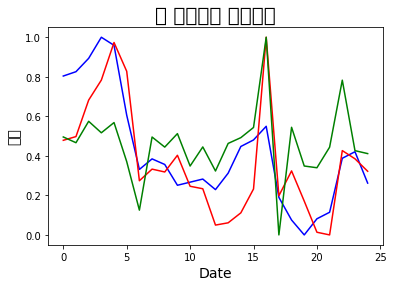

In [161]:
fig = plt.figure() #figsize = (20, 12)
ax = fig.add_subplot(1, 1, 1)

ax.plot(picher['롤 점유율'], label='롤 점유율', color='b') 
ax.plot(picher['사용시간'], label='사용시간', color='r')
ax.plot(picher['롤 전주대비 증감률'], label='롤 전주대비 증감률', color='g')

ax.set_title('롤 점유율과 사용시간', fontsize=20) 
ax.set_ylabel('단위', fontsize=14) 
ax.set_xlabel('Date', fontsize=14)